# Shipment status prediction
### By : Harshit Mehta

### Objective:

Visualizing high dimensional data using PCA and doing dimensionality reduction to check the explained variance using the PCA model. Training a Linear Discriminant Analysis(LDA) model to check if the product has been shipped or canceled.

### Methodology:

Have trained a PCA model to visualize higher-dimensional data and then trained various models like LDA(Linear Discriminant Analysis), PCA-LDA, Random Forest and PCA-Random Forest model to predict which of the products has been shipped and which of the products has been canceled & further performed a comparative study of the different algorihtms used.

**Import necessary libraries**

In [1]:
# importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot

In [2]:
# importing neccessary libraries for PCA 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
# importing neccessary libraries for LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [4]:
# importing neccessary libraries for RF
from sklearn.ensemble import RandomForestClassifier

**Display a sample of five rows of the data frame**

In [5]:
data = pd.read_csv("sales_data_sample.csv")
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


**Check the shape of the data (number of rows and columns). Check the general information about the dataframe using the .info() method.**

In [6]:
data.shape

(2823, 25)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


**Check the percentage of missing values in each column of the data frame.**

In [8]:
missing = round(100 * data.isnull().sum() / len(data),2)
missing[ missing > 0 ]

ADDRESSLINE2    89.30
STATE           52.64
POSTALCODE       2.69
TERRITORY       38.04
dtype: float64

**Check if there are any duplicate rows.**

In [9]:
len(data[data.duplicated()])

0

**Write a function that will impute missing values of the columns “STATE”, “POSTALCODE”,“TERRITORY” with its most occurring label.**

In [10]:
state_mode = data['STATE'].mode()[0]
postal_mode = data['POSTALCODE'].mode()[0]
territory_mode = data['TERRITORY'].mode()[0]
state_mode , postal_mode , territory_mode 

('CA', '28034', 'EMEA')

In [11]:
def impute_col(column, value):
    data[column].fillna(value, inplace=True)

In [12]:
impute_col('STATE', state_mode)
impute_col('POSTALCODE', postal_mode)
impute_col('TERRITORY', territory_mode)

In [13]:
missing = round(100 * data.isnull().sum() / len(data),2)
missing[ missing > 0 ]

ADDRESSLINE2    89.3
dtype: float64

Hence we have confirmed that the desired columns have been imputed.

**Drop “ADDRESSLINE2”,”ORDERDATE”,”PHONE” column**

In [14]:
# Checking the columns of the dataset
data.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [15]:
# Dropping the unwanted columns
data.drop(["ADDRESSLINE2","ORDERDATE","PHONE"],axis=1,inplace=True)

In [16]:
# Re-checking the columns of the dataset to confirm
data.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE',
       'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'ADDRESSLINE1', 'CITY', 'STATE',
       'POSTALCODE', 'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME',
       'CONTACTFIRSTNAME', 'DEALSIZE'],
      dtype='object')

**Convert the labels of the STATUS column to 0 and 1**

In [17]:
data["STATUS"].value_counts()

Shipped       2617
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: STATUS, dtype: int64

In [18]:
data["STATUS"] = data["STATUS"].apply(lambda x: 1 if x=="Shipped" else 0)
data["STATUS"].value_counts()

1    2617
0     206
Name: STATUS, dtype: int64

**Assign ‘STATUS’ column into a label variable and drop it from the original Dataframe**

I feel this step is not needed as the "STATUS" column has only 2 levels - 0 or 1 - and even if I were to use pd.get_dummies() on "STATUS" column and drop the original column, I would get back only one column, something like "STATUS_1" which would be exact copy of "STATUS" column. As in this scenario we do not need it, I have not disturbed the "STATUS" column. Rather, I have dummy coded the remaining categorical columns as that needs to be done before data is fed into PCA.

##### One hot encoding -

Converting all the categorical/label columns into one-hot encoded columns so it can be fed into PCA

In [19]:
cat_variables = list(data.columns[data.dtypes == 'object'])
print(cat_variables)

['PRODUCTLINE', 'PRODUCTCODE', 'CUSTOMERNAME', 'ADDRESSLINE1', 'CITY', 'STATE', 'POSTALCODE', 'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE']


In [20]:
for i in cat_variables:
    data[i] = pd.Categorical(data[i])

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   ORDERNUMBER       2823 non-null   int64   
 1   QUANTITYORDERED   2823 non-null   int64   
 2   PRICEEACH         2823 non-null   float64 
 3   ORDERLINENUMBER   2823 non-null   int64   
 4   SALES             2823 non-null   float64 
 5   STATUS            2823 non-null   int64   
 6   QTR_ID            2823 non-null   int64   
 7   MONTH_ID          2823 non-null   int64   
 8   YEAR_ID           2823 non-null   int64   
 9   PRODUCTLINE       2823 non-null   category
 10  MSRP              2823 non-null   int64   
 11  PRODUCTCODE       2823 non-null   category
 12  CUSTOMERNAME      2823 non-null   category
 13  ADDRESSLINE1      2823 non-null   category
 14  CITY              2823 non-null   category
 15  STATE             2823 non-null   category
 16  POSTALCODE        2823 n

In [22]:
mod_data = pd.get_dummies(data, columns=cat_variables, drop_first=True)

In [23]:
mod_data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,MSRP,...,CONTACTFIRSTNAME_Valarie,CONTACTFIRSTNAME_Veysel,CONTACTFIRSTNAME_Victoria,CONTACTFIRSTNAME_Violeta,CONTACTFIRSTNAME_Wendy,CONTACTFIRSTNAME_William,CONTACTFIRSTNAME_Wing C,CONTACTFIRSTNAME_Yoshi,DEALSIZE_Medium,DEALSIZE_Small
0,10107,30,95.70,2,2871.00,1,1,2,2003,95,...,0,0,0,0,0,0,0,0,0,1
1,10121,34,81.35,5,2765.90,1,2,5,2003,95,...,0,0,0,0,0,0,0,0,0,1
2,10134,41,94.74,2,3884.34,1,3,7,2003,95,...,0,0,0,0,0,0,0,0,1,0
3,10145,45,83.26,6,3746.70,1,3,8,2003,95,...,0,0,0,0,0,0,0,0,1,0
4,10159,49,100.00,14,5205.27,1,4,10,2003,95,...,0,0,0,0,0,0,0,0,1,0


**Use StandardScaler to scale the data**

In [24]:
independent_variables = list(mod_data.columns)
independent_variables.remove("STATUS")

In [25]:
# Standardize the independent variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(mod_data[independent_variables])

## PCA FOR VISUALIZATION

**Take the help of PCA to reduce the data to 2 dimensions. Use n_components=2**

In [26]:
# Create PCA object with 2 components
pca = PCA(n_components=2)

# Fit the data and transform it to 2 dimensions
data_reduced = pca.fit_transform(X_scaled)

**Take the first and second principal components and plot a scatter plot with the labels**

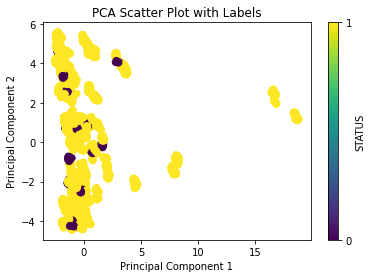

In [27]:
# Take the first and second principal components
pc1 = data_reduced[:, 0]
pc2 = data_reduced[:, 1]

# Plot the scatter plot with labels
plot.scatter(pc1, pc2, s=50, c=np.array(mod_data["STATUS"]), cmap='viridis')
plot.xlabel('Principal Component 1')
plot.ylabel('Principal Component 2')
plot.title('PCA Scatter Plot with Labels')

# Add colorbar for reference
cbar = plot.colorbar(ticks=[0, 1])
cbar.set_ticklabels(['0', '1'])
cbar.set_label('STATUS')

plot.show()

**Write the intuitions about the scatter plot**

Following intuitions can be derived from the scatter plot:

- The scatter plot shows that the first 2 principal components do a fairly good job of segreagating 2 labels into different clusters. Following observations can be made:
    - points with pc1 value greater than 5 fall in the 1 i.e. Shipped category 
    - points with pc2 value greater than 5 also fall in the Shipped category
    - points with pc1 value less than 0 and pc2 value in between 0 and 2 fall in the Shipped category

- As expected much higher variability along PC1 in comparison to PC2.

- Plot suggests no or weak correlation between PC1 and PC2.

- There is ambiguity in labeling points with PC1 value around 0 and PC2 in the ranges (1 to 4) and (-1 to -4) 

## PCA FOR DIMENSION REDUCTION

**Fit the PCA model on the data and plot a graph between n_components and cumulative explained variance**

In [28]:
# Create PCA object with 2 components
pca_n = PCA()

# Fit the data and transform it to 2 dimensions
data_reduced = pca_n.fit_transform(X_scaled)

In [29]:
# Retrieve the eigenvalues
eigenvalues = pca_n.explained_variance_

In [30]:
explained_variance = []
cumulative_explained = 0
total = sum(eigenvalues)
for i in range(0,len(eigenvalues)):
    cumulative_explained = cumulative_explained + eigenvalues[i]
    explained_variance.append(cumulative_explained / total)

In [31]:
x_axis = range(1, len(eigenvalues)+1)

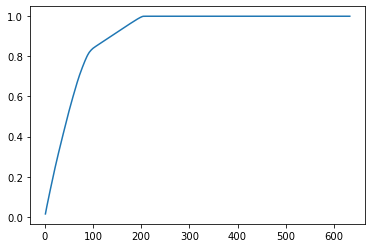

In [32]:
plot.plot(x_axis, explained_variance)

**In how many components we are getting approximately 90% of explained Variance**

In [33]:
for i in range(0,len(eigenvalues)):
    if(explained_variance[i] >= 0.9):
        print(i)
        break

136


As the numbering starts from 0, 136 corresponds to 137th component.

In [34]:
np.array(explained_variance[135:138])*100

array([89.84709369, 90.00625539, 90.16540765])

Observations: 
- We need **137 components** to explain approximately 90% of Variance
- **136** components expain **89.84%** of variance
- **137** components expain **90.01%** of variance
- **138** components expain **90.17%** of variance

# LDA

#### LDA on original data

##### Split the dataset into two parts (i.e. 80% train and 20% test) using random_state=42

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    mod_data[independent_variables], mod_data["STATUS"], test_size=0.2, random_state=42)

##### Train a Linear Discriminant Analysis(LDA) model on the train data. Do fit_transform on the train data and only transform on the test data. Use n_components=1

In [36]:
# Create an LDA object
lda = LinearDiscriminantAnalysis(n_components=1)

# Fit the LDA model to the training data
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=1)

In [37]:
# Predict the class labels for new data
y_pred = lda.predict(X_test)

In [38]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9026548672566371


## PCA-LDA

In [39]:
# Standardize the independent variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Create a PCA object with the desired number of components
pca = PCA(n_components=2)

# Fit the PCA model to the scaled data
pca.fit(X_train_scaled)

# Transform the scaled data to the principal components
X_train_transformed = pca.transform(X_train_scaled)

# Do similar transformations on test data
X_test_scaled = scaler.transform(X_test)
X_test_transformed = pca.transform(X_test_scaled)

# Fitting LDA
# Create an LDA object
lda2 = LinearDiscriminantAnalysis(n_components=1)

# Fit the LDA model to the PCA transformed training data
lda2.fit(X_train_transformed, y_train)

# Predict the class labels for new data
y_pred2 = lda2.predict(X_test_transformed)

# Evaluate the model
accuracy = np.mean(y_pred2 == y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9079646017699115


**The performance of LDA gets improved if PCA is apllied first!**

### Train a RandomForest classifier model on the transformed train and test data. Print the accuracy score. 

## Random Forest

In [40]:
# Create a Random Forest classifier
rf = RandomForestClassifier(n_estimators=500, random_state=42)

# Fit the classifier to the training data
rf.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = rf.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9893805309734514


## PCA - Random Forest

In [41]:
# Create a Random Forest classifier
rf = RandomForestClassifier(n_estimators=500, random_state=42)

# Fit the classifier to the training data
rf.fit(X_train_transformed, y_train)

# Predict the labels for the test data
y_pred = rf.predict(X_test_transformed)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9168141592920354


Observations: 
- The performance of **LDA** improves when applied on **PCA transformed** data, this is because LDA being a linear algorithm is sensitive to outliers which get removed due to PCA.
- The performance of **Random Forest** degrades when applied on **PCA transformed** data, this is because RF is robust to outliers and can handle the outliers much better as it works through segmentation. Infact when we are training the RF on PCA transformed data, it is losing out on information on outlier points which is why it's performance degrades.